# TD5 Python

## 1. Load and return the boston dataset from sklearn.datasets.

In [1]:
from  sklearn import datasets

In [2]:
boston= datasets.load_boston()
X= boston["data"] #tableau de tableaux
Y= boston["target"] # tableau de float

In [12]:
X.shape

(506, 13)

In [9]:
len(Y)

506

## 2. Split the boston dataset into train data and test data.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)
print("X_train: ", X_train.shape,"; X_test: ", X_test.shape)
print("Y_train: ", Y_train.shape, "; Y_test: ", Y_test.shape)


X_train:  (339, 13) ; X_test:  (167, 13)
Y_train:  (339,) ; Y_test:  (167,)


## 3. Standardize the data.

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train) # tableau de tableaux
X_test = scaler.transform(X_test) # tableau de tableaux

## 4. Train or fit the data into a model using the Support Vector Machine Algorithm and test it.

In [37]:
from sklearn import svm, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

import numpy as np
import pandas as pd


### Regression Linéaire

In [38]:
regr = linear_model.LinearRegression()
score = cross_val_score(regr, X_train, Y_train, n_jobs=-1)
print(score)
print("%0.2f de précision avec un écart type de %0.2f" % (score.mean()*100, score.std()*100))

regr.fit(X_train, Y_train)
acc_regr = round(regr.score(X_train, Y_train) * 100, 2)
print("\n",acc_regr)

[0.75521208 0.76855682 0.68246401 0.64043696 0.68384235]
70.61 de précision avec un écart type de 4.83

 73.9


#### La Cross-Validation est une méthode permettant de tester les performances d'un modèle prédictif de Machine Learning. Le processus de validation consiste à décider si les résultats numériques quantifiant les relations hypothétiques entre les variables sont acceptables en tant que descriptions des données

### SVM

In [39]:
svm_method = svm.SVR(kernel='linear')
score2 = cross_val_score(svm_method, X_train, Y_train, n_jobs=-1)
print(score2)
print("%0.2f de précision avec un écart type de %0.2f" % (score2.mean()*100, score2.std()*100))

svm_method.fit(X_train, Y_train)
acc_svm_method = round(svm_method.score(X_train, Y_train) * 100, 2)
print("\n",acc_svm_method)

[0.73764932 0.72534818 0.77419145 0.58426877 0.62881619]
69.01 de précision avec un écart type de 7.15

 70.21


## 5. Select best hyperparameters of the model using GridSearch.

In [40]:
# defining parameter range
parameters = {'gamma': [0.02,0.025,0.04]}
grid= GridSearchCV(svm_method, parameters, n_jobs = -1, cv=5)

# fitting the model for grid search
grid.fit(X_train, Y_train)


print("Best score: ", grid.best_score_)
# print best parameter after tuning
print("Best parameters: ", grid.best_params_)
# print how our model looks after hyper-parameter tuning
print("Best estimator: ", grid.best_estimator_)
acc = round(grid.score(X_train, Y_train) * 100, 2)
print("\n",acc)

Best score:  0.690054780941772
Best parameters:  {'gamma': 0.02}
Best estimator:  SVR(gamma=0.02, kernel='linear')

 70.21


In [41]:
parameters = {'C': [1.5,10,100],
            'gamma' : [0.0370, 0.0375,0.5]}
grid= GridSearchCV(svm_method, parameters, n_jobs = -1)
grid.fit(X_train, Y_train)

print("Best score: ", grid.best_score_)
# print best parameter after tuning
print("Best parameters: ", grid.best_params_)
# print how our model looks after hyper-parameter tuning
print("Best estimator: ", grid.best_estimator_)

acc = round(grid.score(X_train, Y_train) * 100, 2)
print("\n",acc)

Best score:  0.6909585849706632
Best parameters:  {'C': 10, 'gamma': 0.037}
Best estimator:  SVR(C=10, gamma=0.037, kernel='linear')

 70.23


In [42]:
parameters = {'C': [2.5, 3, 4, 10],
            'kernel' :['rbf', 'poly', 'sigmoid'],
            'degree': [0.2, 1, 3, 5],
            'gamma' : [0.0370, 0.0375,0.5]}
grid= GridSearchCV(svm_method, parameters, n_jobs = -1)
grid.fit(X_train, Y_train)

print("Best score: ", grid.best_score_)
# print best parameter after tuning
print("Best parameters: ", grid.best_params_)
# print how our model looks after hyper-parameter tuning
print("Best estimator: ", grid.best_estimator_)

acc = round(grid.score(X_train, Y_train) * 100, 2)
print("\n",acc)

Best score:  0.8008900224345952
Best parameters:  {'C': 10, 'degree': 0.2, 'gamma': 0.037, 'kernel': 'rbf'}
Best estimator:  SVR(C=10, degree=0.2, gamma=0.037)

 85.04


In [43]:
parameters = {'C': [4, 5, 6, 7],
            'kernel' :['rbf'],
            'degree': [1, 2, 3],
            'gamma' : [0.03, 0.05,0.07]}
grid= GridSearchCV(svm_method, parameters, n_jobs = -1)
grid.fit(X_train, Y_train)

print("Best score: ", grid.best_score_)
# print best parameter after tuning
print("Best parameters: ", grid.best_params_)
# print how our model looks after hyper-parameter tuning
print("Best estimator: ", grid.best_estimator_)

acc = round(grid.score(X_train, Y_train) * 100, 2)
print("\n",acc)

Best score:  0.7871645387559452
Best parameters:  {'C': 7, 'degree': 1, 'gamma': 0.05, 'kernel': 'rbf'}
Best estimator:  SVR(C=7, degree=1, gamma=0.05)

 84.48


In [44]:
parameters = {'C': [10, 15, 20, 30],
            'kernel' :['rbf'],
            'gamma': [0.03],
            'epsilon' : [0.01, 0.05,0.15],
            "degree": [1, 2]}
grid= GridSearchCV(svm_method, parameters, n_jobs = -1)
grid.fit(X_train, Y_train)

print("Best score: ", grid.best_score_)
# print best parameter after tuning
print("Best parameters: ", grid.best_params_)
# print how our model looks after hyper-parameter tuning
print("Best estimator: ", grid.best_estimator_)

acc = round(grid.score(X_train, Y_train) * 100, 2)
print("\n",acc)

Best score:  0.8208819730514822
Best parameters:  {'C': 30, 'degree': 1, 'epsilon': 0.15, 'gamma': 0.03, 'kernel': 'rbf'}
Best estimator:  SVR(C=30, degree=1, epsilon=0.15, gamma=0.03)

 88.26


In [45]:
parameters = {'C': [45, 40, 35, 30],
            'kernel' :['rbf'],
            'gamma': [0.03, 0.05],
            'epsilon' : [0.01, 0.02, 0.03],
            "degree": [1]}
grid= GridSearchCV(svm_method, parameters, n_jobs = -1)
grid.fit(X_train, Y_train)

print("Best score: ", grid.best_score_)
# print best parameter after tuning
print("Best parameters: ", grid.best_params_)
# print how our model looks after hyper-parameter tuning
print("Best estimator: ", grid.best_estimator_)

acc = round(grid.score(X_train, Y_train) * 100, 2)
print("\n",acc)

Best score:  0.8348362788071176
Best parameters:  {'C': 45, 'degree': 1, 'epsilon': 0.01, 'gamma': 0.05, 'kernel': 'rbf'}
Best estimator:  SVR(C=45, degree=1, epsilon=0.01, gamma=0.05)

 92.39


## 6. Create a function to test the different hyperparameters.

## 7. Train or fit the data using other algorithms.


### KNN

In [46]:
knn_regression = KNeighborsRegressor(n_neighbors=3)
knn_regression.fit(X_train, Y_train)
Y_pred= knn_regression.predict(X_test)
acc_knn_regression = round(knn_regression.score(X_train, Y_train) * 100, 2)
print(acc_knn_regression)

score3 = cross_val_score(knn_regression, X_train, Y_train, n_jobs=-1)
print(score3)

print("%0.2f de précision avec un écart type de %0.2f" % (score3.mean()*100, score3.std()*100))


88.84
[0.80064301 0.5919545  0.76051082 0.66159905 0.74193028]
71.13 de précision avec un écart type de 7.49


### XGBoost for Regression

In [47]:
# import numpy as np
# import xgboost as xg
# from sklearn.metrics import mean_squared_error as MSE
  
# # Instantiation
# xgb_r = xg.XGBRegressor(objective ='reg:linear', n_estimators = 10, seed = 123)
  
# # Fitting the model
# xgb_r.fit(X_train, Y_train)
  
# # Predict the model
# pred = xgb_r.predict(X_test)
  
# # RMSE Computation
# rmse = np.sqrt(MSE(Y_test, pred))
# print("RMSE : % f" %(rmse))

### Random Forest Regressor

In [48]:
randomForestModel = RandomForestRegressor(n_estimators = 100, random_state = 0)
randomForestModel.fit(X_train, Y_train)

acc_randomForest = round(randomForestModel.score(X_train, Y_train) * 100, 2)
print(acc_randomForest)

98.26


## 8. Compare the performance of the different algorithms. Which is the best Model?

In [49]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Linear Regression', 'Knn Regression', 
              'Random Forest'],
    'Score': [acc_svm_method, acc_regr, acc_knn_regression, 
              acc_randomForest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()


,Model
Score,
98.26,Random Forest
88.84,Knn Regression
73.90,Linear Regression
70.21,Support Vector Machines


Here the best algorithm is the random forest regressor algorithm. It has 83% accuracy with 0.05 standars deviation.

# Exercice 2

## 1. Load and return the dataset titanic from Seaborn library.

### Import libraries

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Loading the dataset

In [51]:
titanic = sns.load_dataset('titanic') # train df

In [68]:
test_df = pd.read_csv("titanic_test.csv")

### 1st view of the dataset

In [69]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [53]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Survived 0 = dead ;  Survived 1 = alive

In [54]:
titanic.isnull().sum()


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [55]:
test_df=test_df.rename(columns={'PassengerId': 'passengerId','Pclass':'pclass', 'Age':'age','SibSp':'sibsp', 'Parch':'parch','Fare':'fare', 'Sex':'sex', "Name":"name", "Embarked":"embarked" })

### Analyses du dataset

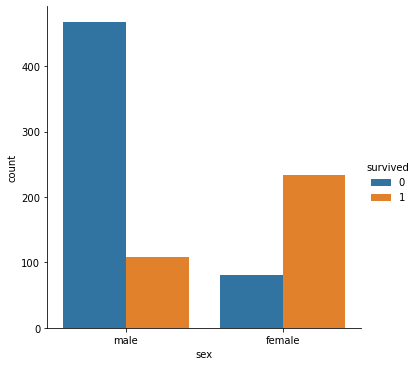

In [56]:
sns.catplot(x ="sex", hue ="survived", kind ="count", data = titanic)

#### The survival rate of men is around 20% and that of women is around 75%. Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

<AxesSubplot:xlabel='survived', ylabel='pclass'>

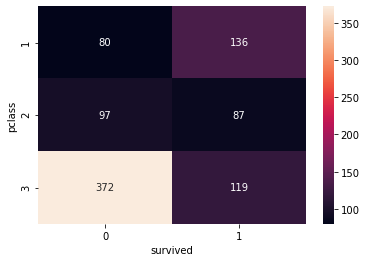

In [57]:
group = titanic.groupby(['pclass', 'survived'])
pclass_survived = group.size().unstack()
 
sns.heatmap(pclass_survived, annot = True, fmt ="d")

#### Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate

#### seaborn.violinplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, bw='scott', cut=2, scale='area', scale_hue=True, gridsize=100, width=0.8, inner='box', split=False, dodge=True, orient=None, linewidth=None, color=None, palette=None, saturation=0.75, ax=None)
#### Draw a combination of boxplot and kernel density estimate.

#### A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

<AxesSubplot:xlabel='pclass', ylabel='survived'>

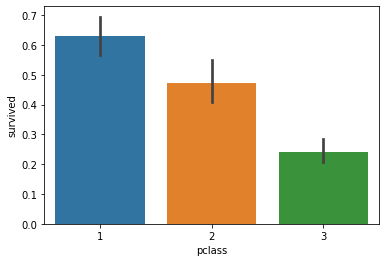

In [62]:
sns.barplot(x='pclass', y='survived', data= titanic)

<AxesSubplot:xlabel='sex', ylabel='age'>

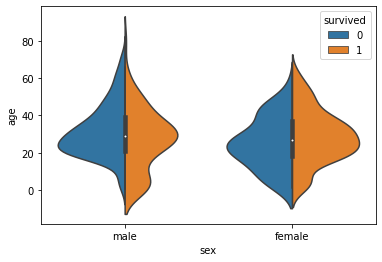

In [58]:
sns.violinplot(x ="sex", y ="age", hue ="survived", data = titanic, split = True)

C:\Users\julie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\julie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\julie\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

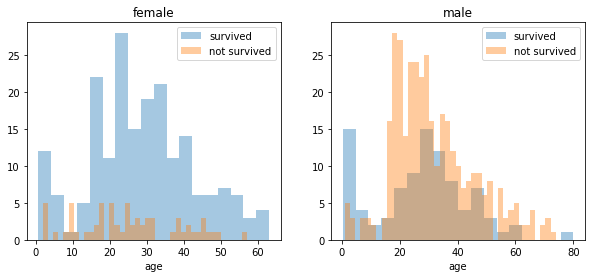

In [66]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic[titanic['sex']=='female']
men = titanic[titanic['sex']=='male']
ax = sns.distplot(women[women['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('female')
ax = sns.distplot(men[men['survived']==1].age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['survived']==0].age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('male')


####  The survival rate is   
#### - Good for children.
#### - High for women in the age range 20-50.
#### - Less for men as the age increases.
#### Since Age column is important, the missing values need to be filled, either by using the Name column(ascertaining age based on salutation – Mr, Mrs etc.) or by using a regressor

#### Pclass is contributing to a persons chance of survival, especially if this person is in class 1

C:\Users\julie\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


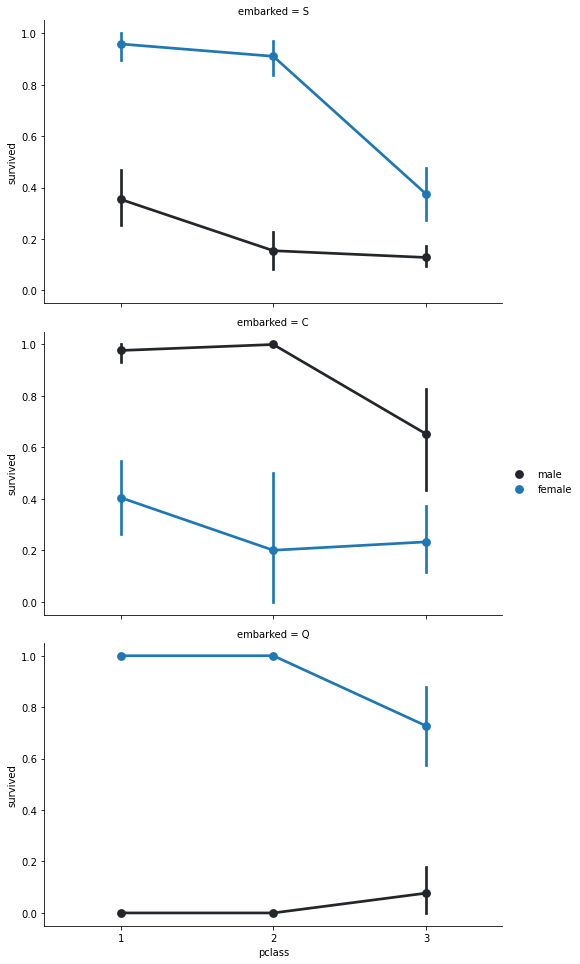

In [61]:
FacetGrid = sns.FacetGrid(titanic, row='embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'pclass', 'survived', 'sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

#### Embarked seems to be correlated with survival, depending on the gender.

### Filled Missing Values

In [10]:
data = [titanic, test_df]

for dataset in data:
    mean = titanic["age"].mean()
    std = test_df["age"].std()
    is_null = dataset["age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["age"] = age_slice
    dataset["age"] = titanic["age"].astype(int)
titanic["age"].isnull().sum()

0

In [11]:
common_value = 'S'
for dataset in titanic:
    titanic['embarked'] = titanic['embarked'].fillna(common_value)
for dataset in test_df:
    test_df['embarked'] = test_df['embarked'].fillna(common_value)

In [12]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [titanic, test_df]

for dataset in data:
    dataset['embarked'] = dataset['embarked'].map(ports)

In [13]:
for dataset in data:
    dataset['fare'] = dataset['fare'].fillna(0)
    dataset['fare'] = dataset['fare'].astype(int)

### Changing string to int : male=0 female=1

In [14]:
genders = {"male": 0, "female": 1}
titanic['sex'] = titanic['sex'].map(genders)


In [15]:
genders = {"male": 0, "female": 1}
test_df['sex'] = test_df['sex'].map(genders)

### Correlation

In [16]:
matrice_corr = titanic.corr(method='pearson')
# plt.figure(figsize=(8,5))
# sns.heatmap(matrice_corr, annot=True)
# plt.show()

matrice_corr.style.background_gradient(cmap="coolwarm")

,survived,pclass,sex,age,sibsp,parch,fare,embarked,adult_male,alone
survived,1.000000,-0.338481,0.543351,-0.062775,-0.035322,0.081629,0.257482,0.106811,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.131900,-0.321532,0.083081,0.018443,-0.550553,0.045702,0.094035,0.135207
sex,0.543351,-0.131900,1.000000,-0.059407,0.114631,0.245489,0.182331,0.116569,-0.908578,-0.303646
age,-0.062775,-0.321532,-0.059407,1.000000,-0.219827,-0.170658,0.090437,0.017746,0.222211,0.159740
sibsp,-0.035322,0.083081,0.114631,-0.219827,1.000000,0.414838,0.159506,-0.059961,-0.253586,-0.584471
parch,0.081629,0.018443,0.245489,-0.170658,0.414838,1.000000,0.216252,-0.078665,-0.349943,-0.583398
fare,0.257482,-0.550553,0.182331,0.090437,0.159506,0.216252,1.000000,0.061061,-0.181907,-0.272355
embarked,0.106811,0.045702,0.116569,0.017746,-0.059961,-0.078665,0.061061,1.000000,-0.108547,0.017807
adult_male,-0.557080,0.094035,-0.908578,0.222211,-0.253586,-0.349943,-0.181907,-0.108547,1.000000,0.404744
alone,-0.203367,0.135207,-0.303646,0.159740,-0.584471,-0.583398,-0.272355,0.017807,0.404744,1.000000


#### PassengerId, Name, Ticket, Deck aren't usefull. They don’t contribute much to the outcome.
#### According to the correlation matrix, survival is strongly related to the variable Fare, sex and alone.

## 2. Use different machine learning models to predict the Survival of Titanic Passengers.


### Import libraries

In [17]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score

### Creating X_train, Y_train and X_test

In [67]:
X_train_titanic = titanic.drop('survived', axis=1)
X_train_titanic = X_train_titanic.drop('class', axis=1)
X_train_titanic = X_train_titanic.drop('who', axis=1)
X_train_titanic = X_train_titanic.drop('adult_male', axis=1)
X_train_titanic = X_train_titanic.drop('alive', axis=1)
X_train_titanic = X_train_titanic.drop('embark_town', axis=1)
X_train_titanic = X_train_titanic.drop('deck', axis=1)
X_train_titanic = X_train_titanic.drop('alone', axis=1)

Y_train_titanic = titanic['survived']

X_test_titanic = test_df.drop("passengerId", axis=1).copy()
X_test_titanic = X_test_titanic.drop("Cabin", axis=1).copy()
X_test_titanic = X_test_titanic.drop("Ticket", axis=1).copy()
X_test_titanic = X_test_titanic.drop("name", axis=1).copy()

In [21]:
print("X_train: ", X_train_titanic.shape,"; X_test: ", X_test_titanic.shape)
print("Y_train: ", Y_train_titanic.shape)

X_train:  (891, 7) ; X_test:  (418, 7)
Y_train:  (891,)


### Logistic Regression

In [22]:
logreg = LogisticRegression()
logreg.fit(X_train_titanic, Y_train_titanic)

Y_pred = logreg.predict(X_test_titanic)

acc_log = round(logreg.score(X_train_titanic, Y_train_titanic) * 100, 2)
print(acc_log)

score6 = cross_val_score(logreg, X_train_titanic, Y_train_titanic, n_jobs=-1)
print("%0.2f de précision avec un écart type de %0.2f" % (score6.mean()*100, score6.std()*100))

80.13


C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


79.35 de précision avec un écart type de 1.51


### KNN

In [23]:
knn_classification = KNeighborsClassifier(n_neighbors = 3) 
knn_classification.fit(X_train_titanic, Y_train_titanic)  
Y_pred = knn_classification.predict(X_test_titanic)  
acc_knn = round(knn_classification.score(X_train_titanic, Y_train_titanic) * 100, 2)
print(acc_knn)

score7 = cross_val_score(knn_classification, X_train_titanic, Y_train_titanic, n_jobs=-1)
print("%0.2f de précision avec un écart type de %0.2f" % (score7.mean()*100, score7.std()*100))

83.61
67.13 de précision avec un écart type de 5.62


### Gaussian - Bayes

In [24]:
gaussian = GaussianNB() 
gaussian.fit(X_train_titanic, Y_train_titanic)  
Y_pred = gaussian.predict(X_test_titanic)  
acc_gaussian = round(gaussian.score(X_train_titanic, Y_train_titanic) * 100, 2)
acc_gaussian

79.24

### SVC

In [25]:
linear_svc = LinearSVC()
linear_svc.fit(X_train_titanic, Y_train_titanic)

Y_pred = linear_svc.predict(X_test_titanic)

acc_linear_svc = round(linear_svc.score(X_train_titanic, Y_train_titanic) * 100, 2)
acc_linear_svc

C:\Users\julie\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


75.98

### Decision Tree

In [26]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train_titanic, Y_train_titanic)  
Y_pred = decision_tree.predict(X_test_titanic)  
acc_decision_tree = round(decision_tree.score(X_train_titanic, Y_train_titanic) * 100, 2)
acc_decision_tree

96.97

### Random Forest

In [27]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_titanic, Y_train_titanic)

Y_prediction = random_forest.predict(X_test_titanic)

random_forest.score(X_train_titanic, Y_train_titanic)
acc_random_forest = round(random_forest.score(X_train_titanic, Y_train_titanic) * 100, 2)
acc_random_forest

96.97

## 3. Which is the best Model?

In [28]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Knn Classification',
              'Naive Bayes', 'Linear SVC',  
              'Decision Tree', 'Random Forest'],
    'Score': [acc_log, acc_knn, acc_gaussian, 
              acc_linear_svc, acc_decision_tree,acc_random_forest]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
96.97,Decision Tree
96.97,Random Forest
83.61,Knn Classification
80.13,Logistic Regression
79.24,Naive Bayes


#### Here the best model is Decision Tree or Random Forest